<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D(Tensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tensorflow 버전 : 직접 미분한 방법을 사용한 예시
# x, y 데이터 세트가 있을 때, 이차 방정식 y = w1x^2 + w2x + b를 만족하는
# parameter w1, w2, b를 추정한다.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# y = 2x^2 + 3x + 5 일 때 x, y 데이터 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x *x + 3 * x +5

In [ ]:
# x, y 만족하는 w1, w2, b를 찾는다.
# y = w1x^2 + w2x + b -->  w1 = 2, w2 = 3, b = 5가 나와야 한다.
lr = 0.01   # learning rate

In [ ]:
# 그래프를 생성한다.
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

In [ ]:
histLoss = []
for epoch in range(1000):
    with tf.GradientTape() as tape:
        # loss 함수 : root mean squared error
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1 * x * x + w2 * x + b - y)))
        
        # loss에 대한 각 variable들의 미분값을 계산한다.
        dw1, dw2, db = tape.gradient(loss, [w1, w2, b])
        
    # variable들을 업데이트한다 (Gradient descent)
    w1.assign_sub(lr * dw1)     # w1 <- w1 - lr * dw1의 의미
    w2.assign_sub(lr * dw2)     # w2.assign(w2 - lr * dw2.numpy())와 동일함
    b.assign_sub(lr * db)
    
    if epoch % 10 == 0:
        histLoss.append(loss.numpy())
        print("epoch = %d, loss = %.4f" % (epoch, loss.numpy()))

epoch = 0, loss = 15.3396
epoch = 10, loss = 7.1791
epoch = 20, loss = 5.3826
epoch = 30, loss = 4.7400
epoch = 40, loss = 4.1643
epoch = 50, loss = 3.6579
epoch = 60, loss = 3.2357
epoch = 70, loss = 2.9064
epoch = 80, loss = 2.6668
epoch = 90, loss = 2.5011
epoch = 100, loss = 2.3874
epoch = 110, loss = 2.3059
epoch = 120, loss = 2.2426
epoch = 130, loss = 2.1889
epoch = 140, loss = 2.1400
epoch = 150, loss = 2.0936
epoch = 160, loss = 2.0483
epoch = 170, loss = 2.0036
epoch = 180, loss = 1.9592
epoch = 190, loss = 1.9148
epoch = 200, loss = 1.8706
epoch = 210, loss = 1.8263
epoch = 220, loss = 1.7820
epoch = 230, loss = 1.7378
epoch = 240, loss = 1.6935
epoch = 250, loss = 1.6493
epoch = 260, loss = 1.6050
epoch = 270, loss = 1.5608
epoch = 280, loss = 1.5165
epoch = 290, loss = 1.4723
epoch = 300, loss = 1.4280
epoch = 310, loss = 1.3838
epoch = 320, loss = 1.3396
epoch = 330, loss = 1.2953
epoch = 340, loss = 1.2511
epoch = 350, loss = 1.2068
epoch = 360, loss = 1.1626
epoch = 370

In [ ]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())


추정 결과 :
w1 = 1.95
w2 = 3.00
b = 4.97
final loss = 0.6283


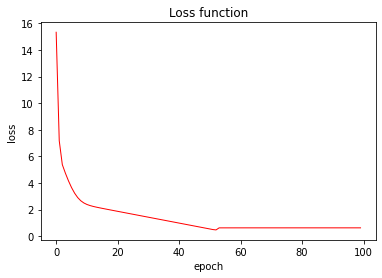

In [ ]:
plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

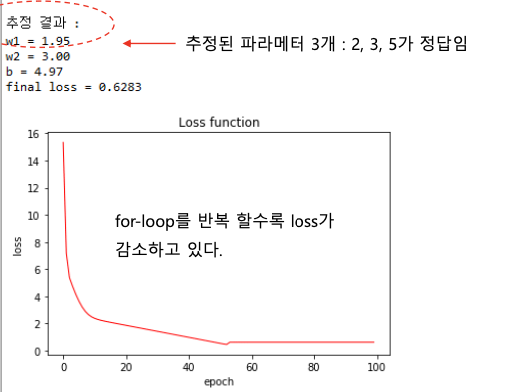